In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/m5-forecasting-accuracy/calendar.csv
/kaggle/input/m5-forecasting-accuracy/sample_submission.csv
/kaggle/input/m5-forecasting-accuracy/sell_prices.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv
/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
calendar=pd.read_csv('/kaggle/input/m5-forecasting-accuracy/calendar.csv')
sell_prices=pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
sales_train_validation=pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sales_train_validation.csv')
sales_train_evaluation=pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv')
sample_submission=pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sample_submission.csv')

In [4]:
for d in range(1942,1970):
    col = 'd_' + str(d)
    sales_train_evaluation[col] = 0
    sales_train_evaluation[col] = sales_train_evaluation[col].astype(np.int16)

In [5]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [6]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [7]:
sales_train_validation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [8]:
sales_train_validation.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3
30489,FOODS_3_827_WI_3_validation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
sales_train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
sales_train_evaluation.tail()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1960,d_1961,d_1962,d_1963,d_1964,d_1965,d_1966,d_1967,d_1968,d_1969
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,0,0,0,0,0,0,0,0,0,0
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,0,0,0,0,0,0,0,0
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
sample_submission.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
sell_prices.tail()

,store_id,item_id,wm_yr_wk,sell_price
6841116,WI_3,FOODS_3_827,11617,1.0
6841117,WI_3,FOODS_3_827,11618,1.0
6841118,WI_3,FOODS_3_827,11619,1.0
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


From the tail we can observe there are number of item_id. We can analyze one of them.

In [13]:
import matplotlib.pyplot as plt

d_cols = [c for c in sales_train_validation.columns if 'd_' in c]
x_1 = sales_train_validation.loc[sales_train_validation['id'] == 'HOBBIES_1_001_CA_1_validation'].set_index('id')[d_cols].T
x_2 = sales_train_validation.loc[sales_train_validation['id'] == 'FOODS_3_090_CA_3_validation'].set_index('id')[d_cols].T
x_3 = sales_train_validation.loc[sales_train_validation['id'] == 'FOODS_3_824_WI_3_validation'].set_index('id')[d_cols].T

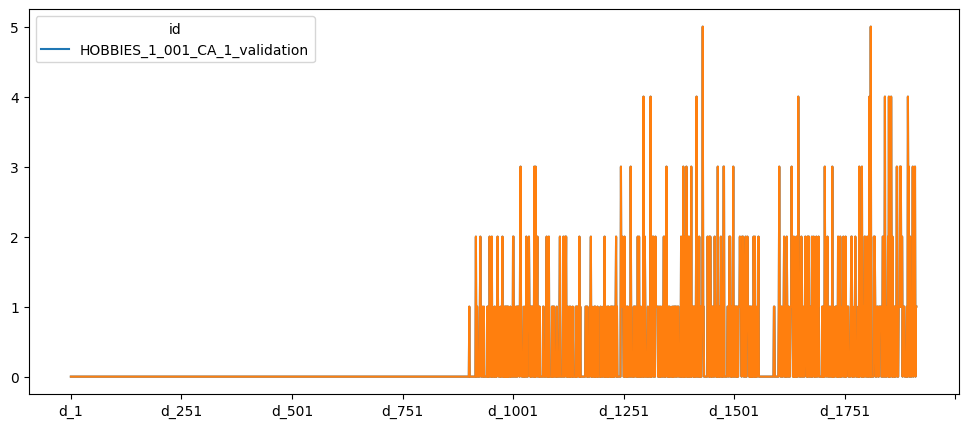

In [14]:
x_1.plot(figsize=(12,5))
plt.plot(x_1)

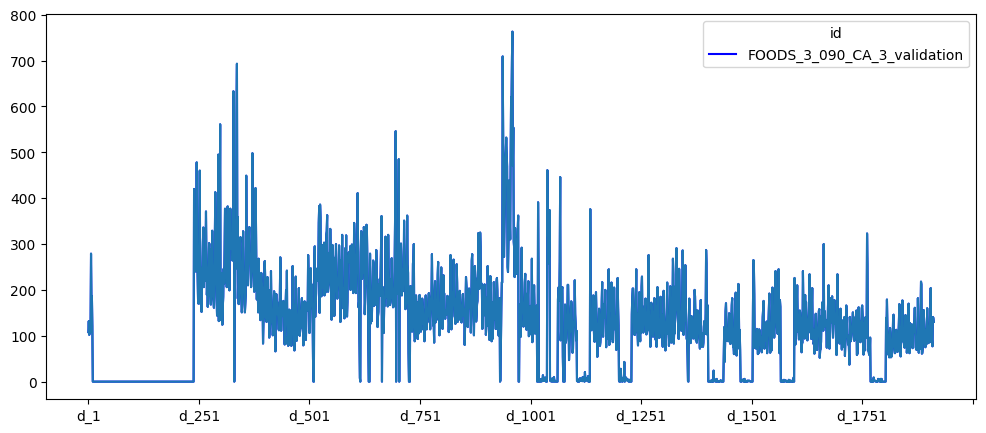

In [15]:
x_2.plot(figsize=(12,5),color='blue')
plt.plot(x_2)

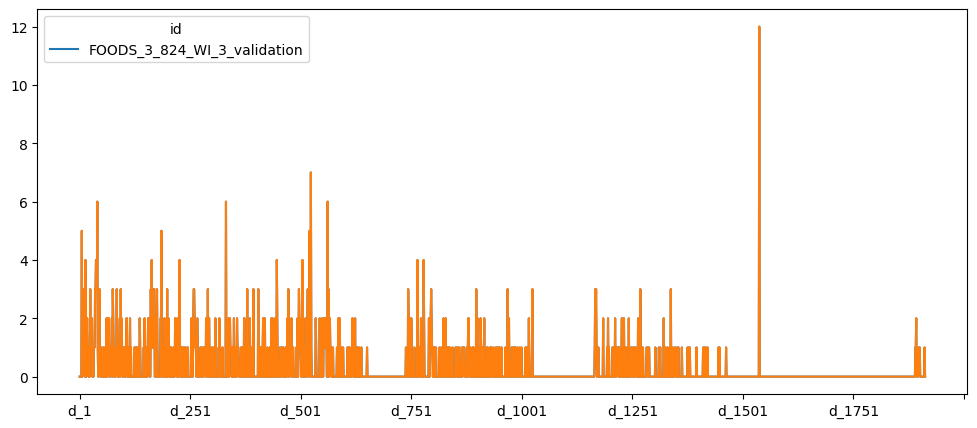

In [16]:
x_3.plot(figsize=(12,5))
plt.plot(x_3)

For better annual or weekly visualization we have to merge plots but since there is no common column we have to first make a column common which can be done by melting the data. 

#### Melting the data

As the data size is too big we will use downcast. The below code is copied.

In [17]:
def downcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
    return df  

sales = downcast(sales_train_evaluation)
prices = downcast(sell_prices)
calendar = downcast(calendar)

In [18]:
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
             var_name='d', value_name='sold')

In [19]:
df.isna().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
d           0
sold        0
dtype: int64

In [20]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
...,...,...,...,...,...,...,...,...
60034805,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,d_1969,0
60034806,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,d_1969,0
60034807,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1969,0
60034808,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1969,0


Now as we have can merge it with calander

In [21]:
df=df.merge(calendar,how='left',on='d')

In [22]:
df = df.merge(sell_prices, on = ["store_id", "item_id", "wm_yr_wk"])

In [23]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961
1,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961
2,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961
3,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,NaN,NaN,NaN,NaN,1,1,0,0.459961
4,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,NaN,NaN,NaN,NaN,1,0,1,0.459961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47735392,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,...,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,3.980469
47735393,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1968,0,2016-06-18,11621,...,6,2016,NaN,NaN,NaN,NaN,0,0,0,1.280273
47735394,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,...,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,1.280273
47735395,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1968,0,2016-06-18,11621,...,6,2016,NaN,NaN,NaN,NaN,0,0,0,1.000000


Now we can visualize data with calander too.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47735397 entries, 0 to 47735396
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             object        
 7   sold          int16         
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       category      
 11  wday          int8          
 12  month         int8          
 13  year          int16         
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       int8          
 19  snap_TX       int8          
 20  snap_WI       int8          
 21  sell_price    float16       
dtypes: category(11), datetime64[ns](1), float16(1), int16(3), int8(5

# EDA

In [25]:
FOODS_3_826_WI_3=df[df['id']=='FOODS_3_826_WI_3_evaluation']

<Axes: xlabel='date'>

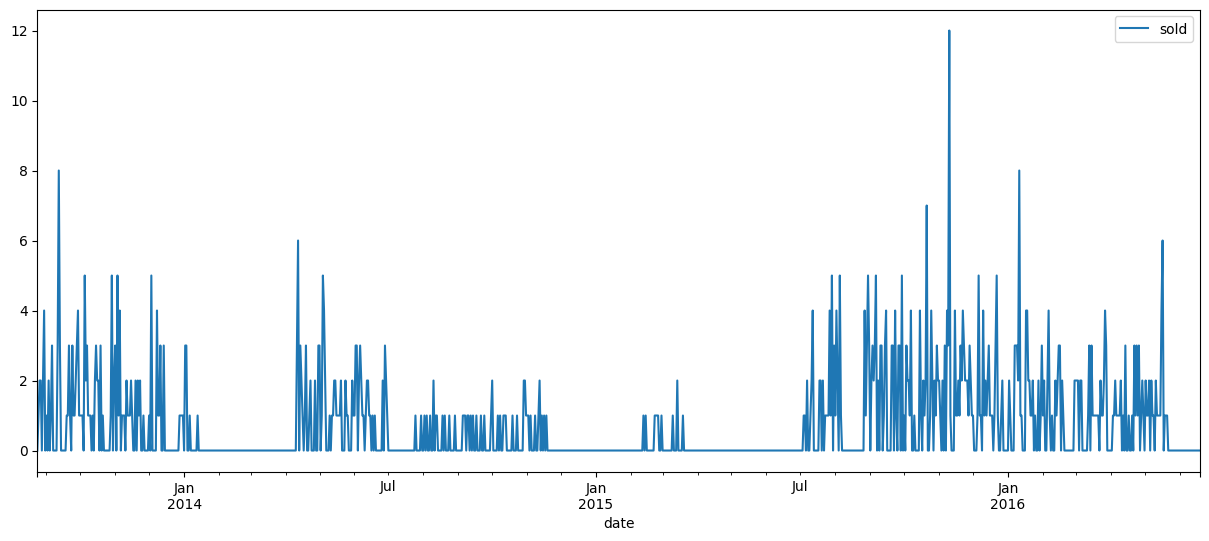

In [26]:
FOODS_3_826_WI_3.plot(y='sold',x='date',figsize=(15,6))

##### Sales broken down by time variable

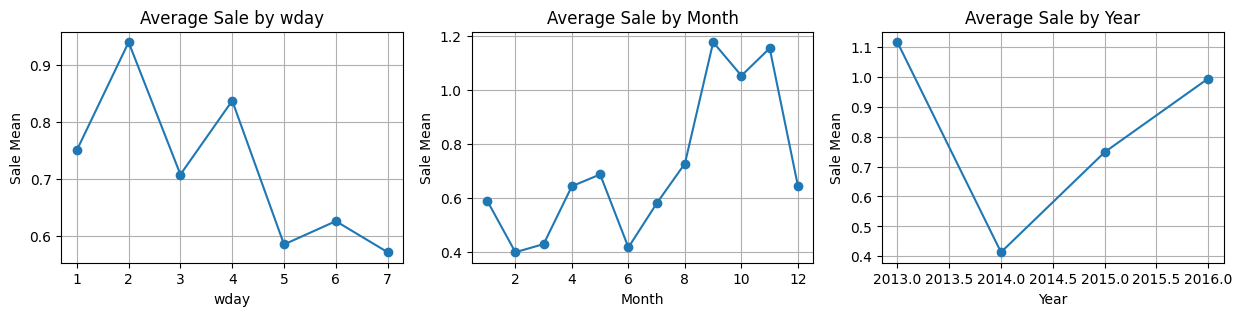

In [27]:
df_day=FOODS_3_826_WI_3.groupby('wday')['sold'].mean()
df_month=FOODS_3_826_WI_3.groupby('month')['sold'].mean()
df_year=FOODS_3_826_WI_3.groupby('year')['sold'].mean()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

ax1.plot(df_day.index, df_day.values, marker='o', linestyle='-')
ax1.set_xlabel('wday')
ax1.set_ylabel('Sale Mean')
ax1.set_title('Average Sale by wday')
ax1.grid(True)

ax2.plot(df_month.index, df_month.values, marker='o', linestyle='-')
ax2.set_xlabel('Month')
ax2.set_ylabel('Sale Mean')
ax2.set_title('Average Sale by Month')
ax2.grid(True)

ax3.plot(df_year.index, df_year.values, marker='o', linestyle='-')
ax3.set_xlabel('Year')
ax3.set_ylabel('Sale Mean')
ax3.set_title('Average Sale by Year')
ax3.grid(True)

#plt.tight_layout()
plt.show()

The sale are increased from 2014.And they are usually high during September to November and usually on Starting Days.

In [28]:
df['cat_id'].unique()

['HOBBIES', 'HOUSEHOLD', 'FOODS']
Categories (3, object): ['FOODS', 'HOBBIES', 'HOUSEHOLD']

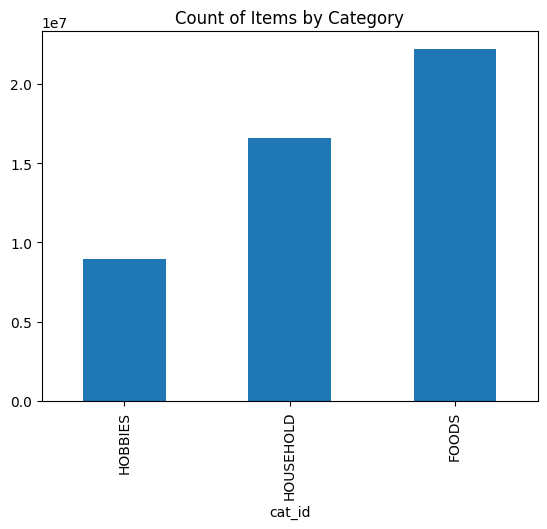

In [29]:
df.groupby('cat_id').count()['id'].sort_values().plot(kind='bar', title='Count of Items by Category')
plt.show()

##### Now let's see each of there sales individually

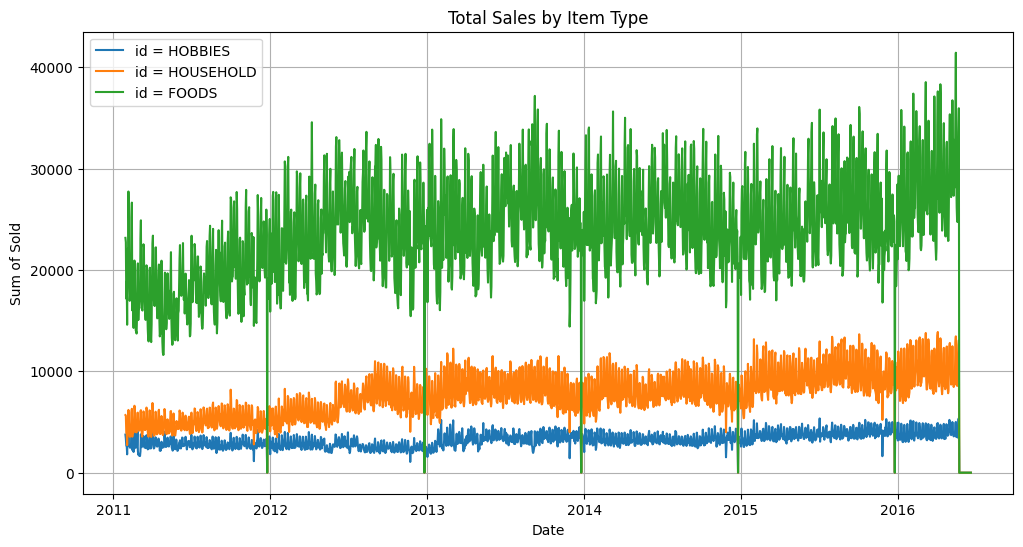

In [30]:
selected_id = ['HOBBIES', 'HOUSEHOLD', 'FOODS']

plt.figure(figsize=(12, 6))

for i,selected_id in enumerate(selected_id):
    filtered_df = df[df['cat_id'] == selected_id]

    # Group by 'date' and calculate the sum of 'sold'
    sum_sold_by_date = filtered_df.groupby('date')['sold'].sum()

    # Plot a line graph for the sum of 'sold' for each 'id' with a different color
    plt.plot(sum_sold_by_date.index, sum_sold_by_date.values,label=f'id = {selected_id}')


plt.xlabel('Date')
plt.ylabel('Sum of Sold')
plt.title('Total Sales by Item Type')
plt.legend()
plt.grid(True)
plt.show()



As Foods count was high from the count graph it was expexted that the counts would also be high for Foods and here we can visualize it easily. 

##### Now let's see sale by store by using rolling mean

In [31]:
df['store_id'].unique()

['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']

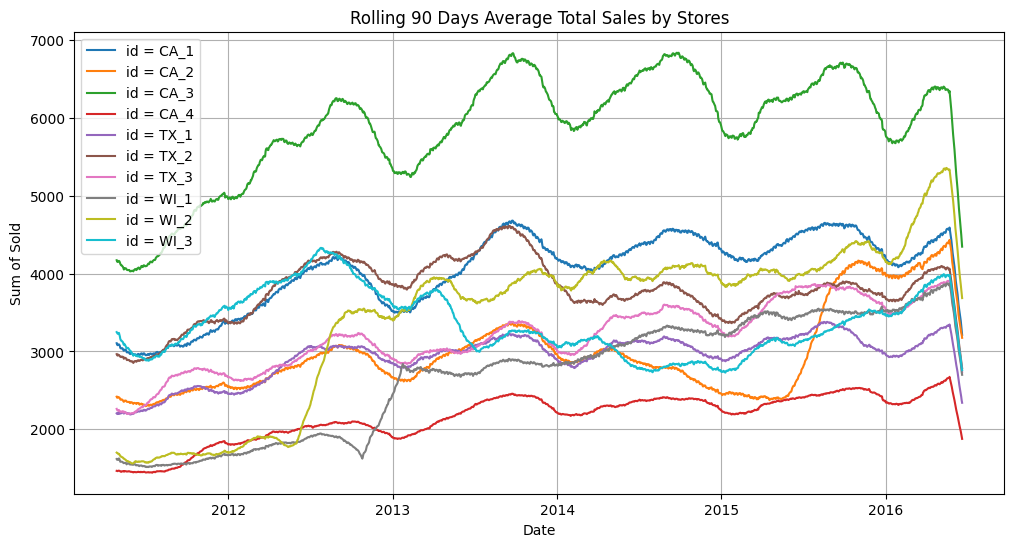

In [32]:
selected_id = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']

plt.figure(figsize=(12, 6))

for i,selected_id in enumerate(selected_id):
    filtered_df = df[df['store_id'] == selected_id]

    # Group by 'date' and calculate the sum of 'sold'
    sum_sold_by_date = filtered_df.groupby('date')['sold'].sum().rolling(90).mean()

    # Plot a line graph for the sum of 'sold' for each 'id' with a different color
    plt.plot(sum_sold_by_date.index, sum_sold_by_date.values,label=f'id = {selected_id}')


plt.xlabel('Date')
plt.ylabel('Sum of Sold')
plt.title('Rolling 90 Days Average Total Sales by Stores')
plt.legend()
plt.grid(True)
plt.show()


Looking at the same data a different way, we can plot a rolling 7 day total demand count by store. Note clearly that some stores have abrupt changes in their demand, it could be that the store expanded or a new competitor was built near by. Either way this is imporant to note when creating predictive models about demand pattern.

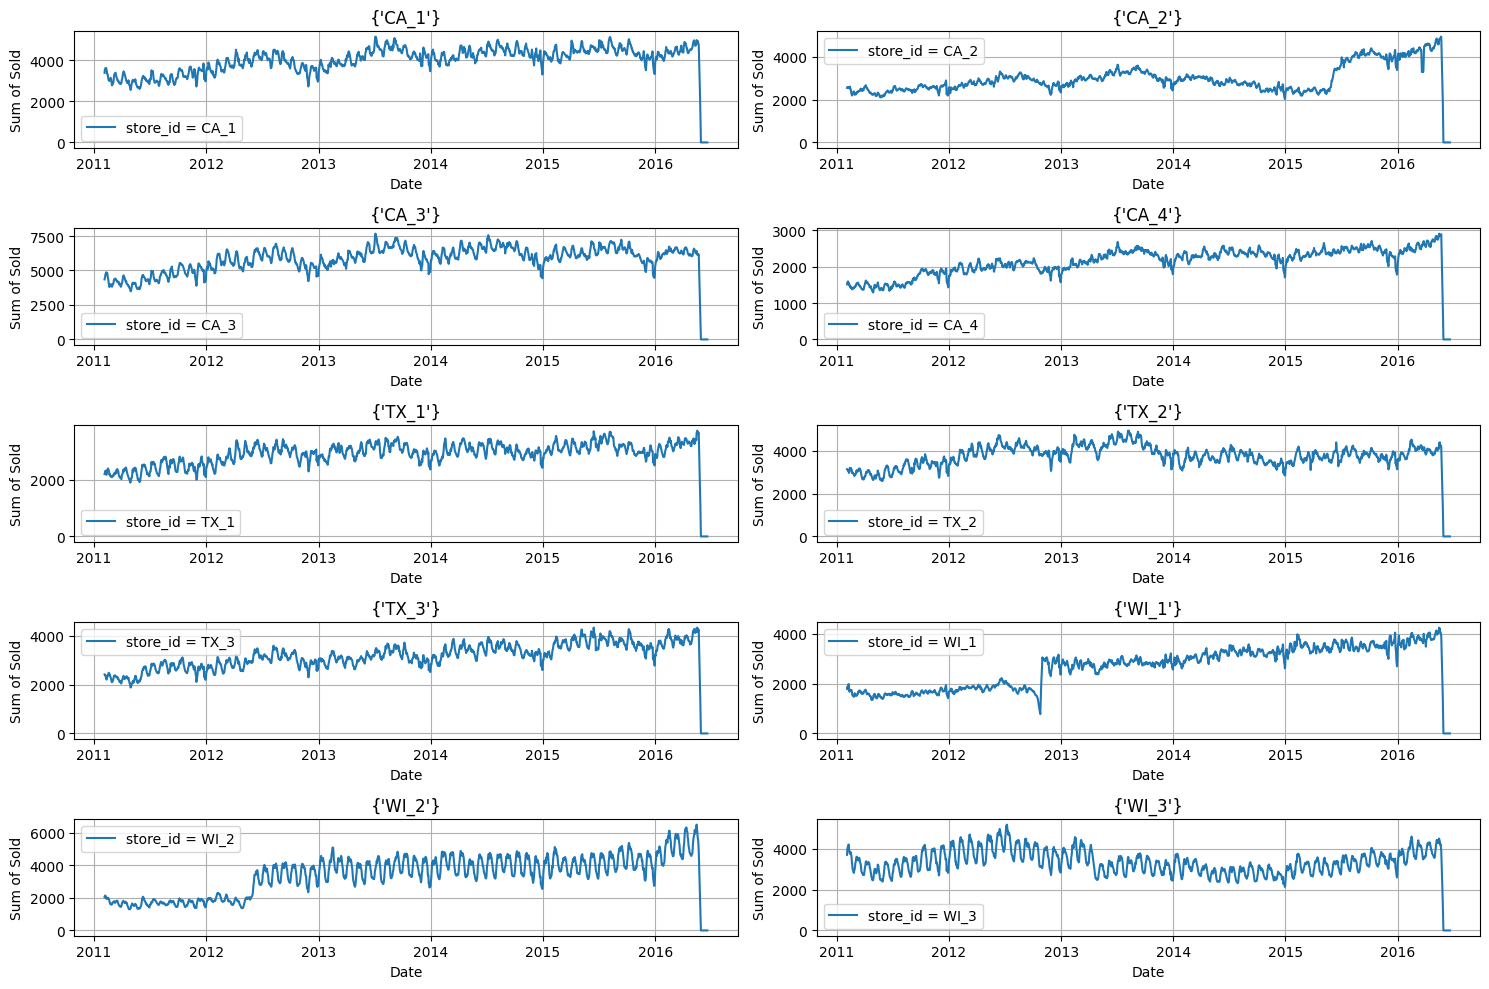

In [33]:
from matplotlib import gridspec
selected_ids = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']

# Create a 15x10 inch figure with 5 sections, each containing 2 plots
fig = plt.figure(figsize=(15, 10))
spec = gridspec.GridSpec(5, 2, figure=fig)

for i, selected_id in enumerate(selected_ids):
    row = i // 2  # Calculate the row for the current store ID
    col = i % 2   # Calculate the column for the current store ID
    ax = fig.add_subplot(spec[row, col])

    filtered_df = df[df['store_id'] == selected_id]

    sum_sold_by_date = filtered_df.groupby('date')['sold'].sum().rolling(7).mean()

    ax.plot(sum_sold_by_date.index, sum_sold_by_date.values, label=f'store_id = {selected_id}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Sum of Sold')
    ax.set_title({selected_id})
    ax.legend()
    ax.grid(True)

plt.tight_layout()

plt.show()


##### Sale Prices over time for a particular item

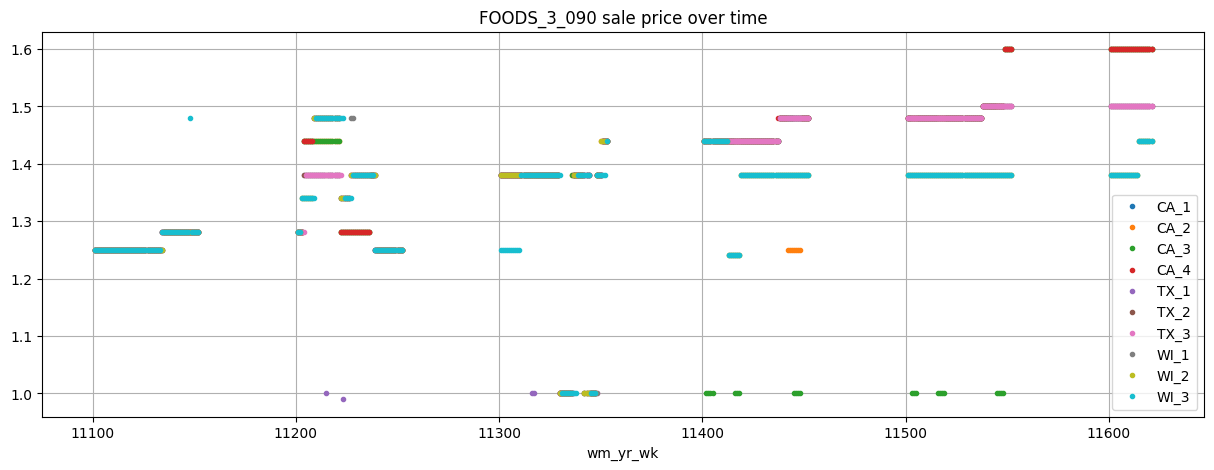

In [34]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []
for store, d in sell_prices.query('item_id == "FOODS_3_090"').groupby('store_id'):
    d.plot(x='wm_yr_wk',y='sell_price',style='.',figsize=(15, 5),
          title='FOODS_3_090 sale price over time',ax=ax,legend=store)
    stores.append(store)
    plt.legend()
plt.legend(stores)
plt.grid(True)
plt.show()

Price of item is increasing with time and different stores have different prices which may depend on demand and geology or competitors.

#### Total Sold Value vs Store Name

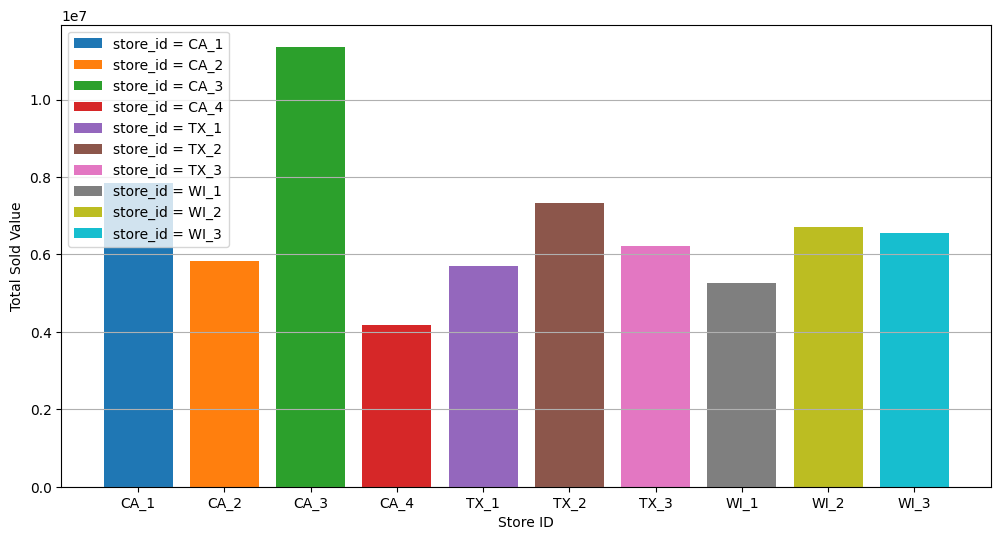

In [35]:
store_ids = df['store_id'].unique()

plt.figure(figsize=(12, 6))

for store_id in store_ids:
    filtered_df = df[df['store_id'] == store_id]

    total_sold = filtered_df['sold'].sum()

    plt.bar(store_id, total_sold, label=f'store_id = {store_id}')

plt.xlabel('Store ID')
plt.ylabel('Total Sold Value')
plt.legend()
plt.grid(axis='y')
plt.show()


# Feature Engineering

In [36]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961
1,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961
2,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.459961
3,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,2,2011,NaN,NaN,NaN,NaN,1,1,0,0.459961
4,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,2,2011,NaN,NaN,NaN,NaN,1,0,1,0.459961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47735392,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,...,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,3.980469
47735393,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1968,0,2016-06-18,11621,...,6,2016,NaN,NaN,NaN,NaN,0,0,0,1.280273
47735394,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,...,6,2016,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0,1.280273
47735395,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1968,0,2016-06-18,11621,...,6,2016,NaN,NaN,NaN,NaN,0,0,0,1.000000


### Introduce lags

as_index argument in a pandas groupby() operation is used to specify whether or not you’d like the column that you grouped by to be used as the index of the output.

In [37]:
lags = [1,2,3,5,7,11]
for lag in lags:
    df['sold_lag_'+str(lag)] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']
                                          ,as_index=False)['sold'].shift(lag).astype(np.float16)

### Mean Encoding

For mean encoding let's first decide features to select.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47735397 entries, 0 to 47735396
Data columns (total 28 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            category      
 1   item_id       category      
 2   dept_id       category      
 3   cat_id        category      
 4   store_id      category      
 5   state_id      category      
 6   d             object        
 7   sold          int16         
 8   date          datetime64[ns]
 9   wm_yr_wk      int16         
 10  weekday       category      
 11  wday          int8          
 12  month         int8          
 13  year          int16         
 14  event_name_1  category      
 15  event_type_1  category      
 16  event_name_2  category      
 17  event_type_2  category      
 18  snap_CA       int8          
 19  snap_TX       int8          
 20  snap_WI       int8          
 21  sell_price    float16       
 22  sold_lag_1    float16       
 23  sold_lag_2    float16       
 

In [39]:
df['iteam_sold_avg'] = df.groupby('item_id')['sold'].transform('mean').astype(np.float16)
df['state_sold_avg'] = df.groupby('state_id')['sold'].transform('mean').astype(np.float16)
df['store_sold_avg'] = df.groupby('store_id')['sold'].transform('mean').astype(np.float16)
df['cat_sold_avg'] = df.groupby('cat_id')['sold'].transform('mean').astype(np.float16)
df['dept_sold_avg'] = df.groupby('dept_id')['sold'].transform('mean').astype(np.float16)
df['cat_dept_sold_avg'] = df.groupby(['cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)
df['store_item_sold_avg'] = df.groupby(['store_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['cat_item_sold_avg'] = df.groupby(['cat_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['dept_item_sold_avg'] = df.groupby(['dept_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['state_store_sold_avg'] = df.groupby(['state_id','store_id'])['sold'].transform('mean').astype(np.float16)
df['state_store_cat_sold_avg'] = df.groupby(['state_id','store_id','cat_id'])['sold'].transform('mean').astype(np.float16)
df['store_cat_dept_sold_avg'] = df.groupby(['store_id','cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)

### Rolling Window

In [40]:
df['rolling_sold_mean'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold']\
.transform(lambda x: x.rolling(window=7).mean()).astype(np.float16)

In [41]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,cat_sold_avg,dept_sold_avg,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean
0,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,0.696777,0.850586,0.850586,7.179688,4.613281,4.613281,1.607422,0.986328,1.237305,NaN
1,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_2,15,2011-01-30,11101,...,0.696777,0.850586,0.850586,7.179688,4.613281,4.613281,1.607422,0.986328,1.237305,NaN
2,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_3,0,2011-01-31,11101,...,0.696777,0.850586,0.850586,7.179688,4.613281,4.613281,1.607422,0.986328,1.237305,NaN
3,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_4,0,2011-02-01,11101,...,0.696777,0.850586,0.850586,7.179688,4.613281,4.613281,1.607422,0.986328,1.237305,NaN
4,HOBBIES_1_008_CA_1_evaluation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_5,0,2011-02-02,11101,...,0.696777,0.850586,0.850586,7.179688,4.613281,4.613281,1.607422,0.986328,1.237305,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47735392,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,...,2.068359,2.572266,2.572266,0.880859,0.705078,0.705078,1.346680,2.099609,2.775391,0.0
47735393,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1968,0,2016-06-18,11621,...,2.068359,2.572266,2.572266,0.716797,1.090820,1.090820,1.346680,2.099609,2.775391,0.0
47735394,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,d_1969,0,2016-06-19,11621,...,2.068359,2.572266,2.572266,0.716797,1.090820,1.090820,1.346680,2.099609,2.775391,0.0
47735395,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,d_1968,0,2016-06-18,11621,...,2.068359,2.572266,2.572266,1.620117,1.660156,1.660156,1.346680,2.099609,2.775391,0.0


Now since all the new features are created, let's save the data so that it can be trained separately.Also, lags introduce a lot of Null values, so we will remove data for first 10 days as we have introduced lags till 11 days.

In [42]:
df.d = df['d'].apply(lambda x: x.split('_')[1]).astype(np.int16)

In [43]:
df = df[df['d']>=11]

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47622948 entries, 76527 to 47735396
Data columns (total 41 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        category      
 1   item_id                   category      
 2   dept_id                   category      
 3   cat_id                    category      
 4   store_id                  category      
 5   state_id                  category      
 6   d                         int16         
 7   sold                      int16         
 8   date                      datetime64[ns]
 9   wm_yr_wk                  int16         
 10  weekday                   category      
 11  wday                      int8          
 12  month                     int8          
 13  year                      int16         
 14  event_name_1              category      
 15  event_type_1              category      
 16  event_name_2              category      
 17  event_t

# Modelling

Now let's split the data such that we can save make the model on part of data and then can validate on next 30 days and create a test set. For test set let's add some entries. 

In [45]:
data = df.copy()
valid = data[(data['d']>=1914) & (data['d']<1942)][['id','d','sold']]
test = data[data['d']>=1942][['id','d','sold']]
eval_preds = test['sold']
valid_preds = valid['sold']

In [46]:
data.drop('date',axis=1,inplace=True)

In [47]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
stores = df.store_id.unique()
for store in stores:
    new_df = data[data['store_id']==store]
    
    #Split the data
    X_train, y_train = new_df[new_df['d']<1914].drop('sold',axis=1), new_df[new_df['d']<1914]['sold']
    X_valid, y_valid = new_df[(new_df['d']>=1914) & (new_df['d']<1942)].drop('sold',axis=1), new_df[(df['d']>=1914) & (new_df['d']<1942)]['sold']
    X_test = new_df[new_df['d']>=1942].drop('sold',axis=1)
    
    #Train and validate
    model = LGBMRegressor(
        n_estimators=500,
        learning_rate=0.3,
        subsample=0.7,
        max_depth=8,
        num_leaves=50
    )
    print('*****Prediction for Store: {}*****'.format(store))
    model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_valid,y_valid)],
             eval_metric='rmse', verbose=20, early_stopping_rounds=20)

*****Prediction for Store: CA_1*****
[20]	training's rmse: 1.90636	training's l2: 3.63423	valid_1's rmse: 1.65653	valid_1's l2: 2.7441
[40]	training's rmse: 1.80708	training's l2: 3.26555	valid_1's rmse: 1.62482	valid_1's l2: 2.64004
[60]	training's rmse: 1.75141	training's l2: 3.06743	valid_1's rmse: 1.61791	valid_1's l2: 2.61764
[80]	training's rmse: 1.71552	training's l2: 2.94301	valid_1's rmse: 1.61247	valid_1's l2: 2.60005
[100]	training's rmse: 1.68628	training's l2: 2.84353	valid_1's rmse: 1.6124	valid_1's l2: 2.59982
*****Prediction for Store: CA_2*****
[20]	training's rmse: 1.57818	training's l2: 2.49064	valid_1's rmse: 1.55764	valid_1's l2: 2.42625
[40]	training's rmse: 1.51299	training's l2: 2.28914	valid_1's rmse: 1.52198	valid_1's l2: 2.31641
[60]	training's rmse: 1.4782	training's l2: 2.18507	valid_1's rmse: 1.51479	valid_1's l2: 2.2946
[80]	training's rmse: 1.45513	training's l2: 2.1174	valid_1's rmse: 1.51309	valid_1's l2: 2.28943
*****Prediction for Store: CA_3*****
[2

In [48]:
valid_preds[X_valid.index] = model.predict(X_valid)
eval_preds[X_test.index] = model.predict(X_test)

In [49]:
valid_preds

45966979    0.000000
45966980    0.000000
45966981    0.000000
45966982    2.000000
45966983    0.000000
              ...   
47034107    1.642655
47034113    2.281204
47034114    1.723622
47034120    2.712350
47034121    2.493224
Name: sold, Length: 853720, dtype: float64

# Let's try other models too

Let's use the last 30 days' sales as the validation data and the sales of the 70 days before that as the training data. We need to predict the sales in the validation data using the sales in the training data.

In [50]:
train_dataset = sales_train_validation[d_cols[-100:-30]]
val_dataset = sales_train_validation[d_cols[-30:]]

## Exponential smoothing

The previous time steps are exponentially weighted and added up to generate the forecast. The weights decay as we move further backwards in time. 

seasonal_periods

The number of periods in a complete seasonal cycle, e.g., 4 for quarterly data or 7 for daily data with a weekly cycle.

In [51]:
from statsmodels.tsa.api import ExponentialSmoothing
predictions = []
for row in train_dataset[train_dataset.columns[-30:]].values[:3]:
    fit = ExponentialSmoothing(row, seasonal_periods=3).fit()
    predictions.append(fit.forecast(30))
predictions = np.array(predictions).reshape((-1, 30))
error_exponential = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

In [52]:
print(error_exponential)

0.24305158701831683


In [53]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train")
    #row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val")
    #row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"),
               name="Pred")
    #row=1, col=1
)
""
"""fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
               name="Denoised signal"),
    row=3, col=1
)
"""
fig.update_layout(height=500, width=800, title_text="ARIMA")
fig.show()

## ARIMA

In [54]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
predictions = []
for row in train_dataset[train_dataset.columns[-30:]].values[:3]:
    fit = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit()
    predictions.append(fit.forecast(30))
predictions = np.array(predictions).reshape((-1, 30))
error_arima = np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.33880D+00    |proj g|=  5.86242D-02

At iterate    5    f=  1.31653D+00    |proj g|=  6.99741D-03

At iterate   10    f=  1.31623D+00    |proj g|=  5.07027D-03

At iterate   15    f=  1.31618D+00    |proj g|=  9.97168D-04

At iterate   20    f=  1.31617D+00    |proj g|=  2.42867D-04

At iterate   25    f=  1.31617D+00    |proj g|=  1.54801D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     38      1     0     0   4.056D-04   1.316D+00
  F =   1.3161701630216054     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07721D-01    |proj g|=  3.45103D-01

At iterate    5    f=  5.57480D-01    |proj g|=  1.62643D-02

At iterate   10    f=  5.56235D-01    |proj g|=  1.17134D-02

At iterate   15    f=  5.56123D-01    |proj g|=  3.24275D-03


 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   20    f=  5.56112D-01    |proj g|=  4.04135D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     45      2     0     0   3.968D-05   5.561D-01
  F =  0.55611229201127277     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53335D+00    |proj g|=  2.93043D-01

At iterate    5    f=  1.36660D+00    |proj g|=  3.23288D-02

At iterate   10    f=  1.36245D+00    |proj g|=  1.31316D-03

At iter

In [55]:
print(error_arima)

0.28782884520174773


In [56]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pred_1 = predictions[0]
pred_2 = predictions[1]
pred_3 = predictions[2]

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
               name="Train")
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
               name="Val")
)
fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"),
               name="Pred")
)

fig.update_layout(height=500, width=800, title_text="ARIMA")
fig.show()